## Distribution Binomiale: principes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import binom
import scipy.special as sp

# Exercice 2

In [2]:
N = 10
p = 0.2
q = 1-p

Je vous propose de créer un dataframe contenant:  

- une colonne 'X' reprenant le nombre de fois que l'évènement se produit sur N expériences
- une colonne 'fac' reprenant le facteur C(N,X) ou encore N!/(X!(N-X)!), premier facteur de la formule des slides
- une colonne 'p**X' reprenant le deuxième facteur
- une colonne 'q**(N-X)' reprenant le troisième facteur
- une colonne 'prob' reprenant le calcul explicite sur base de la formule des slides = prob(p,N,X) = facteur1*facteur2*facteur3
- une colonne 'scipy.stats.binom' reprenant le résultat comme directement calculé par le point d'entrée scipy.stats.binom dans le package scipy

In [3]:
data_df = pd.DataFrame()

data_df['X'] = range(0,N+1) # toutes les valeurs entières de arg1 à arg2-1 soit ici, de 0 à N, N compris
data_df['p**X'] = p**data_df['X']
data_df['q**(N-X)'] = q**(N-data_df['X'])
data_df['fac'] = sp.comb(N,data_df['X']) # voir la doc en ligne
data_df['prob'] = data_df['fac'] * data_df['p**X'] * data_df['q**(N-X)']
data_df['scipy.stats.binom'] = data_df['X'].apply(lambda x:binom.pmf(x,N,p))

In [4]:
data_df

,X,p**X,q**(N-X),fac,prob,scipy.stats.binom
0,0,1.000000e+00,0.107374,1.0,1.073742e-01,1.073742e-01
1,1,2.000000e-01,0.134218,10.0,2.684355e-01,2.684355e-01
2,2,4.000000e-02,0.167772,45.0,3.019899e-01,3.019899e-01
3,3,8.000000e-03,0.209715,120.0,2.013266e-01,2.013266e-01
4,4,1.600000e-03,0.262144,210.0,8.808038e-02,8.808038e-02
5,5,3.200000e-04,0.327680,252.0,2.642412e-02,2.642412e-02
6,6,6.400000e-05,0.409600,210.0,5.505024e-03,5.505024e-03
7,7,1.280000e-05,0.512000,120.0,7.864320e-04,7.864320e-04
8,8,2.560000e-06,0.640000,45.0,7.372800e-05,7.372800e-05
9,9,5.120000e-07,0.800000,10.0,4.096000e-06,4.096000e-06


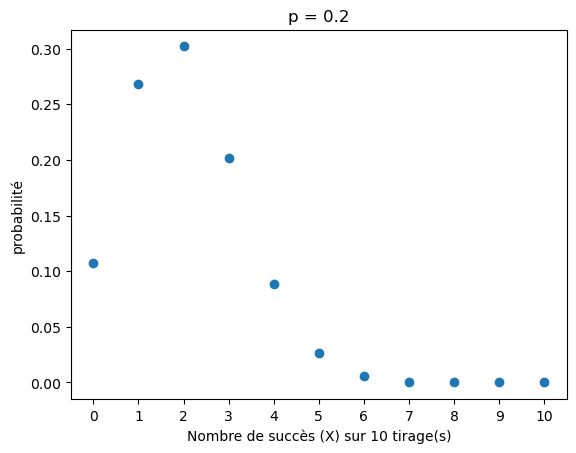

In [5]:
plt.plot(data_df['X'],data_df['prob'],'o')
plt.xlabel('Nombre de succès (X) sur {} tirage(s)'.format(N))
plt.ylabel('probabilité')
plt.title('p = {}'.format(p))
plt.xticks(ticks=range(N+1)) 
plt.show()

In [6]:
data_df[data_df['X']>10]['prob'].sum()

0.0

Ici, la distribution n'est pas symétrique parce que la pièce qui sert au tirage n'est pas équilibrée... la probabilité de tirer pile est de 0.2 alors que la probabilité de tirer face est de 0.8.
Donc, la probabilité que sur 10 tirages on obtienne 10 piles (10 succès) est de $(0.2)**10=1.024e-07$ alors que la probabilité d'obtenir 10 faces (0 succès) est de $(0.8)**10=0.107$

Voyez aussi que sur 10 tirages le plus probable est d'avoir 2 succès (2 piles) avec une probabilité de 0.302.

Calculons la moyenne de cette distribution et vérifions qu'elle est bien égale à N*p comme repris dans les slides:

In [7]:
def valeurFoisProba(r):
    return r['X']*r['prob']

data_df['valeur * proba'] = data_df.apply(valeurFoisProba, axis=1)
# Same as:
data_df['valeur * proba'] = data_df.apply(lambda r:r['X']*r['prob'], axis=1)

moyenne = data_df['valeur * proba'].sum()

print('moyenne (calcul explicite):{}'.format(moyenne))
print('moyenne (calcul par la formule):{}'.format(N*p))

moyenne (calcul explicite):2.000000000000001
moyenne (calcul par la formule):2.0


De même pour la variance, on peut la calculer suivant:

In [8]:
data_df['(carre ecart a la moyenne) * proba'] = data_df.apply(lambda r:(r['X']-moyenne)**2*r['prob'], axis=1)

variance = data_df['(carre ecart a la moyenne) * proba'].sum()

print('variance (calcul explicite):{}'.format(variance))
print('variance (calcul par la formule:{}'.format(N*p*(1-p)))

variance (calcul explicite):1.600000000000001
variance (calcul par la formule:1.6


## Exercice 3

Pour une pièce équilibrée, nous aurons $p=0.5$ et nous obtiendrons une distribution symétrique. Voyons cela:

In [9]:
p = 0.5
q = 1-p

In [10]:
data_df = pd.DataFrame()

data_df['X'] = range(0,N+1)
data_df['p**X'] = p**data_df['X']
data_df['q**(N-X)'] = q**(N-data_df['X'])
data_df['fac'] = sp.comb(N,data_df['X'])
data_df['prob'] = data_df['fac'] * data_df['p**X'] * data_df['q**(N-X)']
data_df['scipy.stats.binom'] = data_df['X'].apply(lambda x:binom.pmf(x,N,p))

data_df.head(6)

,X,p**X,q**(N-X),fac,prob,scipy.stats.binom
0,0,1.00000,0.000977,1.0,0.000977,0.000977
1,1,0.50000,0.001953,10.0,0.009766,0.009766
2,2,0.25000,0.003906,45.0,0.043945,0.043945
3,3,0.12500,0.007812,120.0,0.117188,0.117188
4,4,0.06250,0.015625,210.0,0.205078,0.205078
5,5,0.03125,0.031250,252.0,0.246094,0.246094


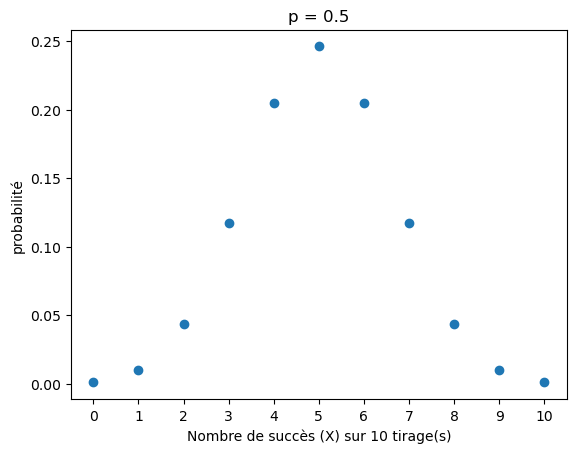

In [11]:
plt.plot(data_df['X'],data_df['prob'],'o')
plt.xlabel('Nombre de succès (X) sur {} tirage(s)'.format(N))
plt.ylabel('probabilité')
plt.title('p = {}'.format(p))
plt.xticks(ticks=range(N+1)) 
plt.show()

Ici, le plus probable est d'obtenir 5 fois piles et 5 fois faces, avec une probabilité de 0.246

## Exercice 4

In [12]:
N = 4       # Famille de 4 enfants => maximum 4 essais!!!
p = 0.5     # Autant de chance d'avoir une fille qu'un garçon
q = 1-p

data_df = pd.DataFrame()

data_df['X'] = range(0,N+1)
data_df['p**X'] = p**data_df['X']
data_df['q**(N-X)'] = q**(N-data_df['X'])
data_df['fac'] = sp.comb(N,data_df['X'])
data_df['prob'] = data_df['fac'] * data_df['p**X'] * data_df['q**(N-X)']
data_df['scipy.stats.binom'] = data_df['X'].apply(lambda x:binom.pmf(x,N,p))
data_df['n_families'] = 2000*data_df['prob']  # Nombre de famille dans un cas de figure = prob du cas de figure * 2000 familles 

data_df

,X,p**X,q**(N-X),fac,prob,scipy.stats.binom,n_families
0,0,1.0000,0.0625,1.0,0.0625,0.0625,125.0
1,1,0.5000,0.1250,4.0,0.2500,0.2500,500.0
2,2,0.2500,0.2500,6.0,0.3750,0.3750,750.0
3,3,0.1250,0.5000,4.0,0.2500,0.2500,500.0
4,4,0.0625,1.0000,1.0,0.0625,0.0625,125.0


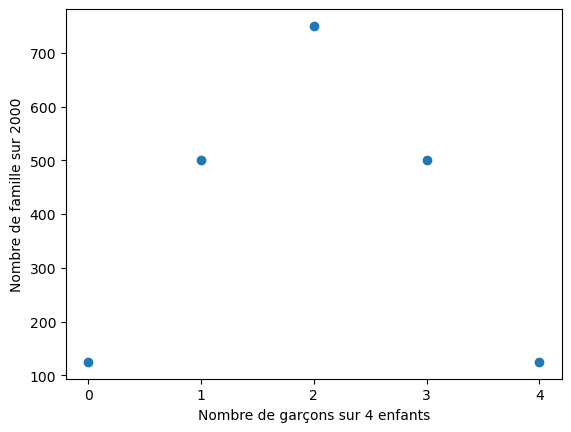

In [13]:
plt.plot(data_df['X'],data_df['n_families'],'o')
plt.xlabel('Nombre de garçons sur 4 enfants'.format(N))
plt.ylabel('Nombre de famille sur 2000')
plt.xticks(ticks=range(N+1))      # des fractions d'enfant n'ont pas de sens => fixons la position des ticks aux 5 premiers entiers
plt.show()

De là (de ces valeurs-là), on obtient:  
a) "au moins 1 garçon" équivalent à "1, 2, 3 ou 4 garçons" = 500 + 750 + 500 + 125 = 1875  
b) exactement 2 garçons: 750  
c) "au plus deux garçons" équivalent à "0, 1 ou 2 garçons" = 125 + 500 + 750 = 1375  
d) "1 ou 2 filles" équivalent à "3 garçons ou 2 garçons" = 500 + 750 = 1250  
e) "aucune fille" équivalent à "4 garçons" = 125

## Exercice 4.bis avec les 'bonnes' proportions garçons/filles à la naissance

In [14]:
N = 4

p = 105/(105+100) # 100 filles pour 105 garçons
print('p:{}'.format(p))
q = 1-p

data_df = pd.DataFrame()

data_df['X'] = range(0,N+1)
data_df['p**X'] = p**data_df['X']
data_df['q**(N-X)'] = q**(N-data_df['X'])
data_df['fac'] = sp.comb(N,data_df['X'])
data_df['prob'] = data_df['fac'] * data_df['p**X'] * data_df['q**(N-X)']
data_df['scipy.stats.binom'] = data_df['X'].apply(lambda x:binom.pmf(x,N,p))
data_df['n_families'] = 2000*data_df['prob']  # Nombre de famille dans un cas de figure = prob du cas de figure * 2000 familles 

data_df

p:0.5121951219512195


,X,p**X,q**(N-X),fac,prob,scipy.stats.binom,n_families
0,0,1.000000,0.056622,1.0,0.056622,0.056622,113.243831
1,1,0.512195,0.116075,4.0,0.237812,0.237812,475.624089
2,2,0.262344,0.237954,6.0,0.374554,0.374554,749.107939
3,3,0.134371,0.487805,4.0,0.262188,0.262188,524.375558
4,4,0.068824,1.000000,1.0,0.068824,0.068824,137.648584


In [15]:
data_df['n_families'].sum()

1999.9999999999998

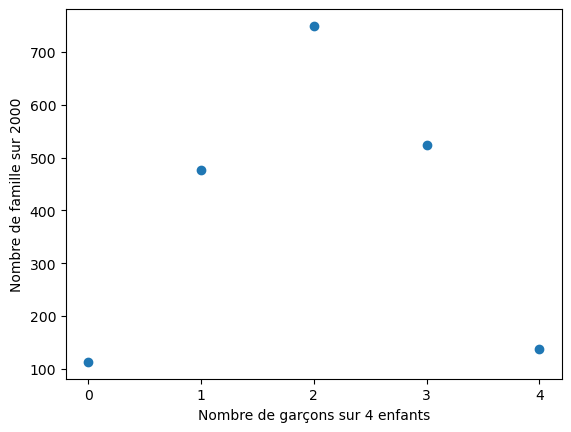

In [16]:
plt.plot(data_df['X'],data_df['n_families'],'o')
plt.xticks(ticks=range(5))
plt.xlabel('Nombre de garçons sur 4 enfants'.format(N))
plt.ylabel('Nombre de famille sur 2000')
plt.xticks(ticks=range(N+1)) 
plt.show()

In [17]:
data_df[(data_df['X']==2)|(data_df['X']==3)]['n_families'].sum()

1273.4834970119553

L'asymétrie fille/garçon est bien visible!

De là (de ces valeurs-là), on obtient:  
a) "au moins 1 garçon" équivalent à "1, 2, 3 ou 4 garçons" = data_df[data_df['X']!=0]['n_families'].sum() = 1886.756 arrondi à 1887 familles  
b) exactement 2 garçons: 749.10 arrondi à 749  
c) "au plus deux garçons" équivalent à "0, 1 ou 2 garçons" = data_df[data_df['X']<=2]['n_families'].sum() = 1337.97 arrondi à 1338 familles  
d) "1 ou 2 filles" équivalent à "3 garçons ou 2 garçons" = data_df[data_df['X']==2)|(data_df['X']==3)]['n_families'].sum() = 1273.48 arrondi à 1273 familles  
e) "aucune fille" équivalent à "4 garçons" = 137.65 arrondi à 138 familles

## Exercice 5

In [18]:
N = 4       # Echantillon de 4 pièces
p = 0.05    # Probabilité d'avoir un défaut
q = 1-p

data_df = pd.DataFrame()

data_df['X'] = range(0,N+1)
data_df['p**X'] = p**data_df['X']
data_df['q**(N-X)'] = q**(N-data_df['X'])
data_df['fac'] = sp.comb(N,data_df['X'])
data_df['prob'] = data_df['fac'] * data_df['p**X'] * data_df['q**(N-X)']
data_df['scipy.stats.binom'] = data_df['X'].apply(lambda x:binom.pmf(x,N,p))

data_df

,X,p**X,q**(N-X),fac,prob,scipy.stats.binom
0,0,1.000000,0.814506,1.0,0.814506,0.814506
1,1,0.050000,0.857375,4.0,0.171475,0.171475
2,2,0.002500,0.902500,6.0,0.013538,0.013538
3,3,0.000125,0.950000,4.0,0.000475,0.000475
4,4,0.000006,1.000000,1.0,0.000006,0.000006


In [19]:
#
# Réponse à c) en une ligne python:
#
data_df[data_df['X']<=2]['prob'].sum()

0.9995187499999998

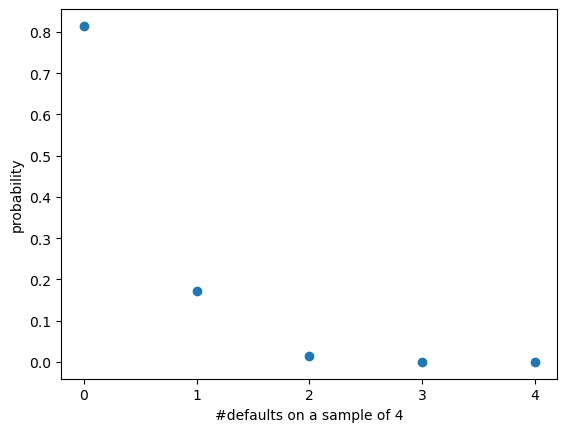

In [20]:
#
# Représentation graphique des probabilités de tous les échantillons possibles
# de 4 tirages, en fonction du nombre de défauts constaté (de 0 à 4 défauts)
#
plt.scatter(x=data_df['X'],y=data_df['prob'])
plt.xlabel('#defaults on a sample of {}'.format(N))
plt.ylabel('probability')
plt.xticks(data_df['X'])
plt.show()

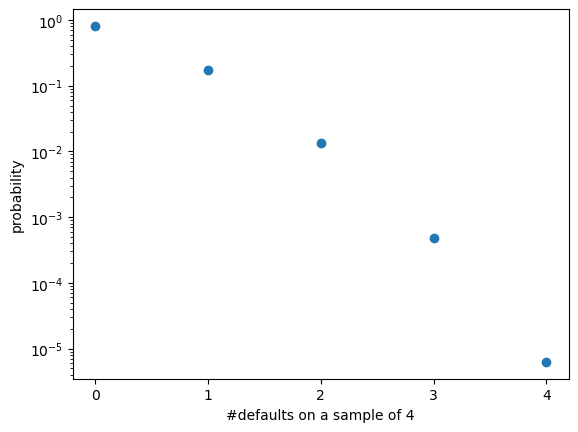

In [21]:
#
# Représentation graphique des probabilités de tous les échantillons possibles
# de 4 tirages, en fonction du nombre de défauts constaté (de 0 à 4 défauts)
#
# Une échelle logarithmique en Y s'impose car sinon, il est très difficile de 
# faire la différence entre proba(3 défauts) et proba(4 défauts)
#
plt.scatter(x=data_df['X'],y=data_df['prob'])
plt.xlabel('#defaults on a sample of {}'.format(N))
plt.ylabel('probability')
plt.xticks(data_df['X'])
plt.yscale('log')
plt.show()